Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


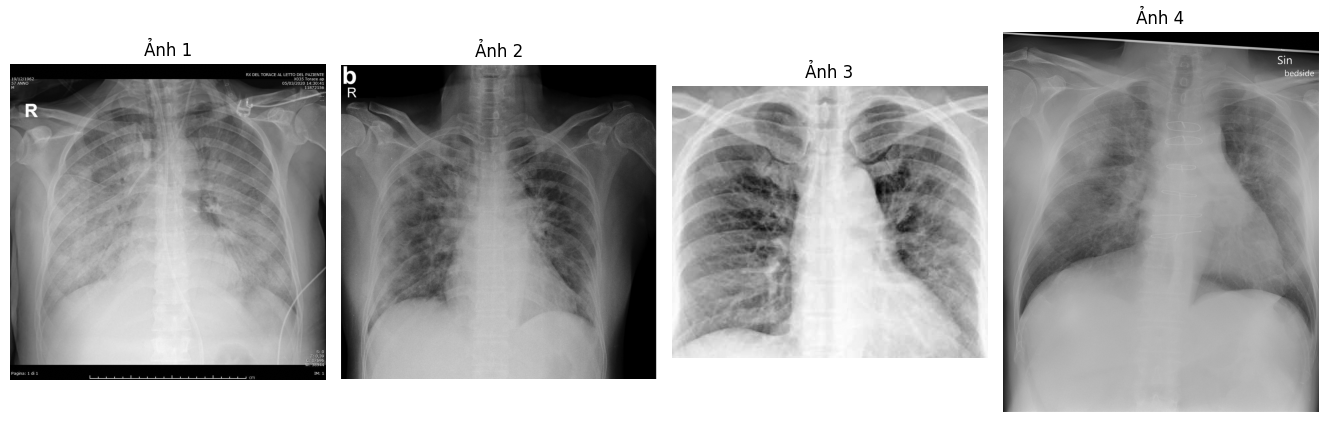

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile
dataset_path = '/content/drive/MyDrive/Colab Notebooks/archive.zip'
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall('dataset')

import os
import matplotlib.pyplot as plt
import cv2

# Đường dẫn thực tế – điều chỉnh nếu cần
folder = '/content/dataset/dataset/covid'

# Danh sách ảnh đúng tên thật
image_names = [
    '31BA3780-2323-493F-8AED-62081B9C383B.jpeg',
    '1-s2.0-S0929664620300449-gr2_lrg-b.jpg',
    '1-s2.0-S1684118220300608-main.pdf-001.jpg',
    'covid-19-pneumonia-15-PA.jpg'
]
plt.figure(figsize=(20, 7))

for i in range(4):
    filename = image_names[i]
    path = folder + '/' + filename

    # Đọc ảnh dưới dạng grayscale
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Không đọc được ảnh: {filename}")
        continue

    plt.subplot(1, 6, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Ảnh {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


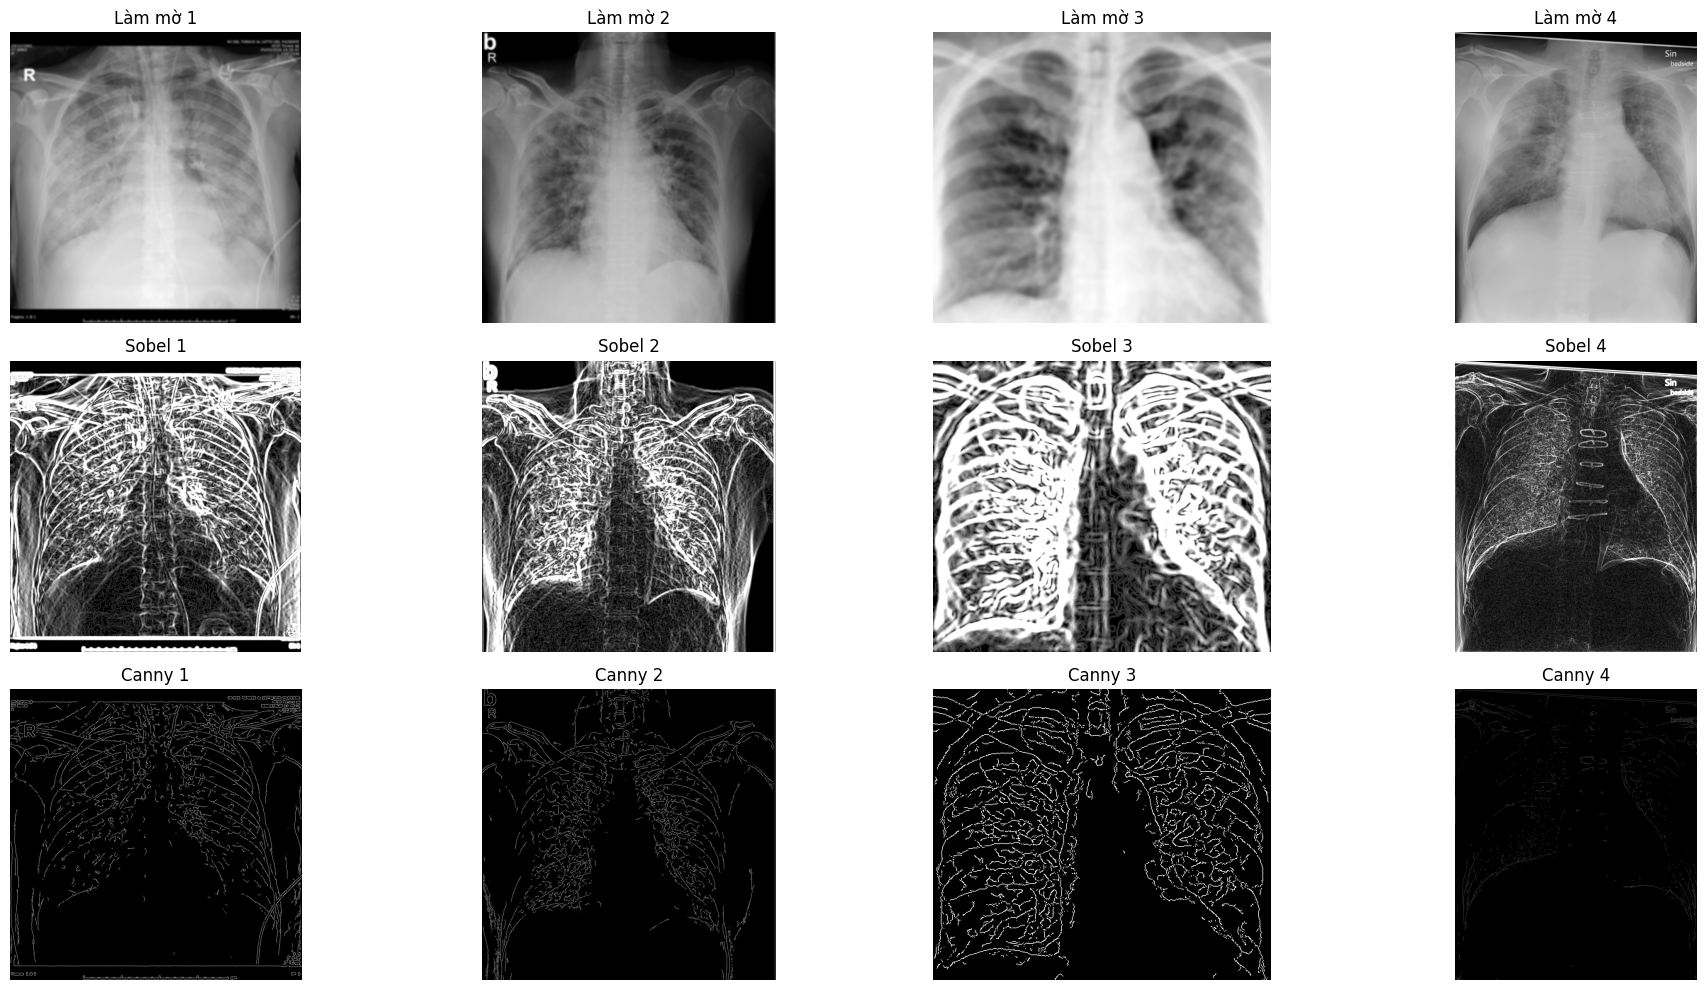

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Hàm Gaussian
def Gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, kernel_size, 0)

# Hàm Sobel
def Sobel_edge(img):
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    sobel_magnitude = cv2.magnitude(sobelx, sobely)

    # Đưa về dạng 8-bit để hiển thị
    sobel_magnitude = cv2.convertScaleAbs(sobel_magnitude)

    return sobel_magnitude

# Hàm Canny
def Canny_edge(img, threshold1 =0, threshole2=20):
    return cv2.Canny(img, threshold1,threshole2)


plt.figure(figsize=(20, 10))

for i in range(4):
    filename = image_names[i]
    path = folder + '/' + filename

    # Đọc ảnh grayscale (như bạn đã có rồi)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Không đọc được ảnh: {filename}")
        continue

    # Làm mờ
    blur_img = Gaussian_blur(img, kernel_size=(15, 15))

    # Phát hiện biên bằng Sobel
    sobel_img = Sobel_edge(blur_img)

    # Phát hiện biên bằng Canny
    canny_img = Canny_edge(blur_img)

    # Hiển thị ảnh làm mờ (hàng 1)
    plt.subplot(3, 4, i + 1)
    plt.imshow(blur_img, cmap='gray')
    plt.title(f"Làm mờ {i+1}")
    plt.axis('off')

    # Hiển thị Sobel (hàng 2)
    plt.subplot(3, 4, i + 1 + 4)
    plt.imshow(sobel_img, cmap='gray')
    plt.title(f"Sobel {i+1}")
    plt.axis('off')

    # Hiển thị Canny (hàng 3)
    plt.subplot(3, 4, i + 1 + 8)
    plt.imshow(canny_img, cmap='gray')
    plt.title(f"Canny {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


1. Gaussian

Ưu điểm:
Hữu ích trong chuẩn bị trước cho các bước phát hiện biên hoặc phân đoạn.
Giữ lại cấu trúc tổng thể, tránh biến dạng lớn.

Nhược điểm:
Làm mất chi tiết nhỏ, trong ảnh y tế thì chi tiết (vết nứt xương, khối u nhỏ) rất quan trọng.làm mờ biên khiến phát hiện biên kém

2. Sobel Filter

Ưu điểm:
Phát hiện biên theo hướng ngang/dọc khá tốt. làm nổi bật cấu trúc (ví dụ viền xương,mô ).

Nhược điểm:
Chỉ quét vùng to, không tối ưu cho chi tiết phức tạp trong ảnh y tế.

3. Canny

Ưu điểm:
Giảm ảnh hưởng của nhiễu nhờ Gaussian blur tích hợp.phát hiện viền cơ xương , nhiều chi tiết khác

Nhược điểm:
Kết quả phụ thuộc nhiều vào tham số ngưỡng (threshold1, threshold2).
Nếu chọn tham số không phù hợp → mất biên
không phù hợp cho ảnh y tế có nhiều chi tiết nhỏ

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
import cv2

# =============================
# 🖼️ Ảnh gốc
# =============================
image_path = '/content/dataset/dataset/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
original_img = img.copy()

# =============================
# 🛠️ Các hàm xử lý ảnh
# =============================
def apply_gaussian(img, kernel, sigma):
    return cv2.GaussianBlur(img, (kernel, kernel), sigma)

def apply_median(img, kernel):
    return cv2.medianBlur(img, kernel)

def apply_sharpen(img, kernel_size=3, strength=1.0):
    sharpen_kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
    sharpened = cv2.filter2D(img, -1, sharpen_kernel)
    sharpened = cv2.addWeighted(img, 1 - strength, sharpened, strength, 0)
    return sharpened

def apply_Sobel(img):
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    sobel_magnitude = cv2.magnitude(sobelx, sobely)
    sobel_magnitude = cv2.convertScaleAbs(sobel_magnitude)
    return sobel_magnitude

def apply_Canny(img, threshold1=100, threshold2=200):
    return cv2.Canny(img, threshold1, threshold2)

def apply_Laplacian(img):
    laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=5)
    laplacian = cv2.convertScaleAbs(laplacian)
    return laplacian

# =============================
# 🎛️ Widgets giao diện 1 (Làm mờ, sharpen)
# =============================
operation_dropdown1 = widgets.Dropdown(
    options=["Gaussian Blur", "Median Blur", "Sharpen"],
    description="Bộ lọc:"
)
kernel_slider1 = widgets.IntSlider(value=3, min=1, max=31, step=2, description='Kernel:')
sigma_slider1 = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Sigma:')
strength_slider1 = widgets.FloatSlider(value=1.0, min=0.0, max=2.0, step=0.1, description='Strength:')

output1 = widgets.Output()

def process_image1(operation, kernel, sigma, strength):
    output1.clear_output()
    processed_img = None

    with output1:
        if kernel % 2 == 0:
            kernel += 1

        if operation == "Gaussian Blur":
            processed_img = apply_gaussian(original_img, kernel, sigma)
        elif operation == "Median Blur":
            processed_img = apply_median(original_img, kernel)
        elif operation == "Sharpen":
            processed_img = apply_sharpen(original_img, kernel_size=kernel, strength=strength)

        plt.figure(figsize=(6, 6))
        plt.imshow(processed_img, cmap='gray')
        plt.title(f"Kết quả: {operation}")
        plt.axis('off')
        plt.show()

interactive_ui1 = widgets.interactive_output(
    process_image1,
    {
        'operation': operation_dropdown1,
        'kernel': kernel_slider1,
        'sigma': sigma_slider1,
        'strength': strength_slider1,
    }
)

ui1 = widgets.VBox([operation_dropdown1, kernel_slider1, sigma_slider1, strength_slider1])
display(widgets.Label("Giao diện 1: Làm mờ "), ui1, output1, interactive_ui1)

# =============================
# 🎛️ Widgets giao diện 2 (Biên: Sobel, Canny, Laplacian)
# =============================
operation_dropdown2 = widgets.Dropdown(
    options=["Sobel", "Canny", "Laplacian"],
    description="Bộ lọc:"
)

t1_slider = widgets.IntSlider(value=100, min=0, max=255, step=1, description='Thresh1:')
t2_slider = widgets.IntSlider(value=200, min=0, max=255, step=1, description='Thresh2:')

output2 = widgets.Output()

def process_image2(operation, threshold1, threshold2):
    output2.clear_output()
    processed_img = None

    with output2:
        if operation == "Sobel":
            processed_img = apply_Sobel(original_img)
        elif operation == "Canny":
            processed_img = apply_Canny(original_img, threshold1, threshold2)
        elif operation == "Laplacian":
            processed_img = apply_Laplacian(original_img)

        plt.figure(figsize=(6, 6))
        plt.imshow(processed_img, cmap='gray')
        plt.title(f"Kết quả: {operation}")
        plt.axis('off')
        plt.show()

interactive_ui2 = widgets.interactive_output(
    process_image2,
    {
        'operation': operation_dropdown2,
        'threshold1': t1_slider,
        'threshold2': t2_slider,
    }
)

ui2 = widgets.VBox([operation_dropdown2, t1_slider, t2_slider])
display(widgets.Label("Giao diện 2"), ui2, output2, interactive_ui2)


Label(value='Giao diện 1: Làm mờ & Sharpen')

Output()

Output()

Label(value='Giao diện 2')

Output()

Output()